In [4]:
from os import environ

environ['optimizer'] = 'Adam'
environ['num_workers']= '2'
environ['maxsize']= '10000'
environ['batch_size']= str(512)
environ['n_epochs']= '500'
environ['batch_norm']= 'True'
environ['loss_func']='mse'
environ['layers'] = '300 200 120 80 30'
environ['dropouts'] = '0.05 0.05 0.1 0.1 0.05'
environ['log'] = 'True'
environ['weight_decay'] = '0.00'

%run utils.ipynb

In [6]:
l = l.load(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}") 

In [11]:
l.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


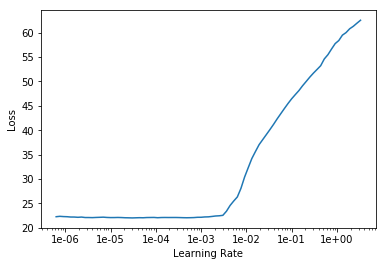

In [12]:
l.recorder.plot()

In [77]:
lr = 1e-05

In [78]:
l.fit_one_cycle(500, lr)

epoch,train_loss,valid_loss
1,20.607269,20.838434
2,20.572981,21.046347
3,20.524773,20.490526
4,20.505909,20.579035
5,20.655590,21.425268
6,20.648302,21.915030
7,20.586678,21.569431
8,20.568081,21.216703
9,20.645319,20.922182
10,20.574635,21.783293


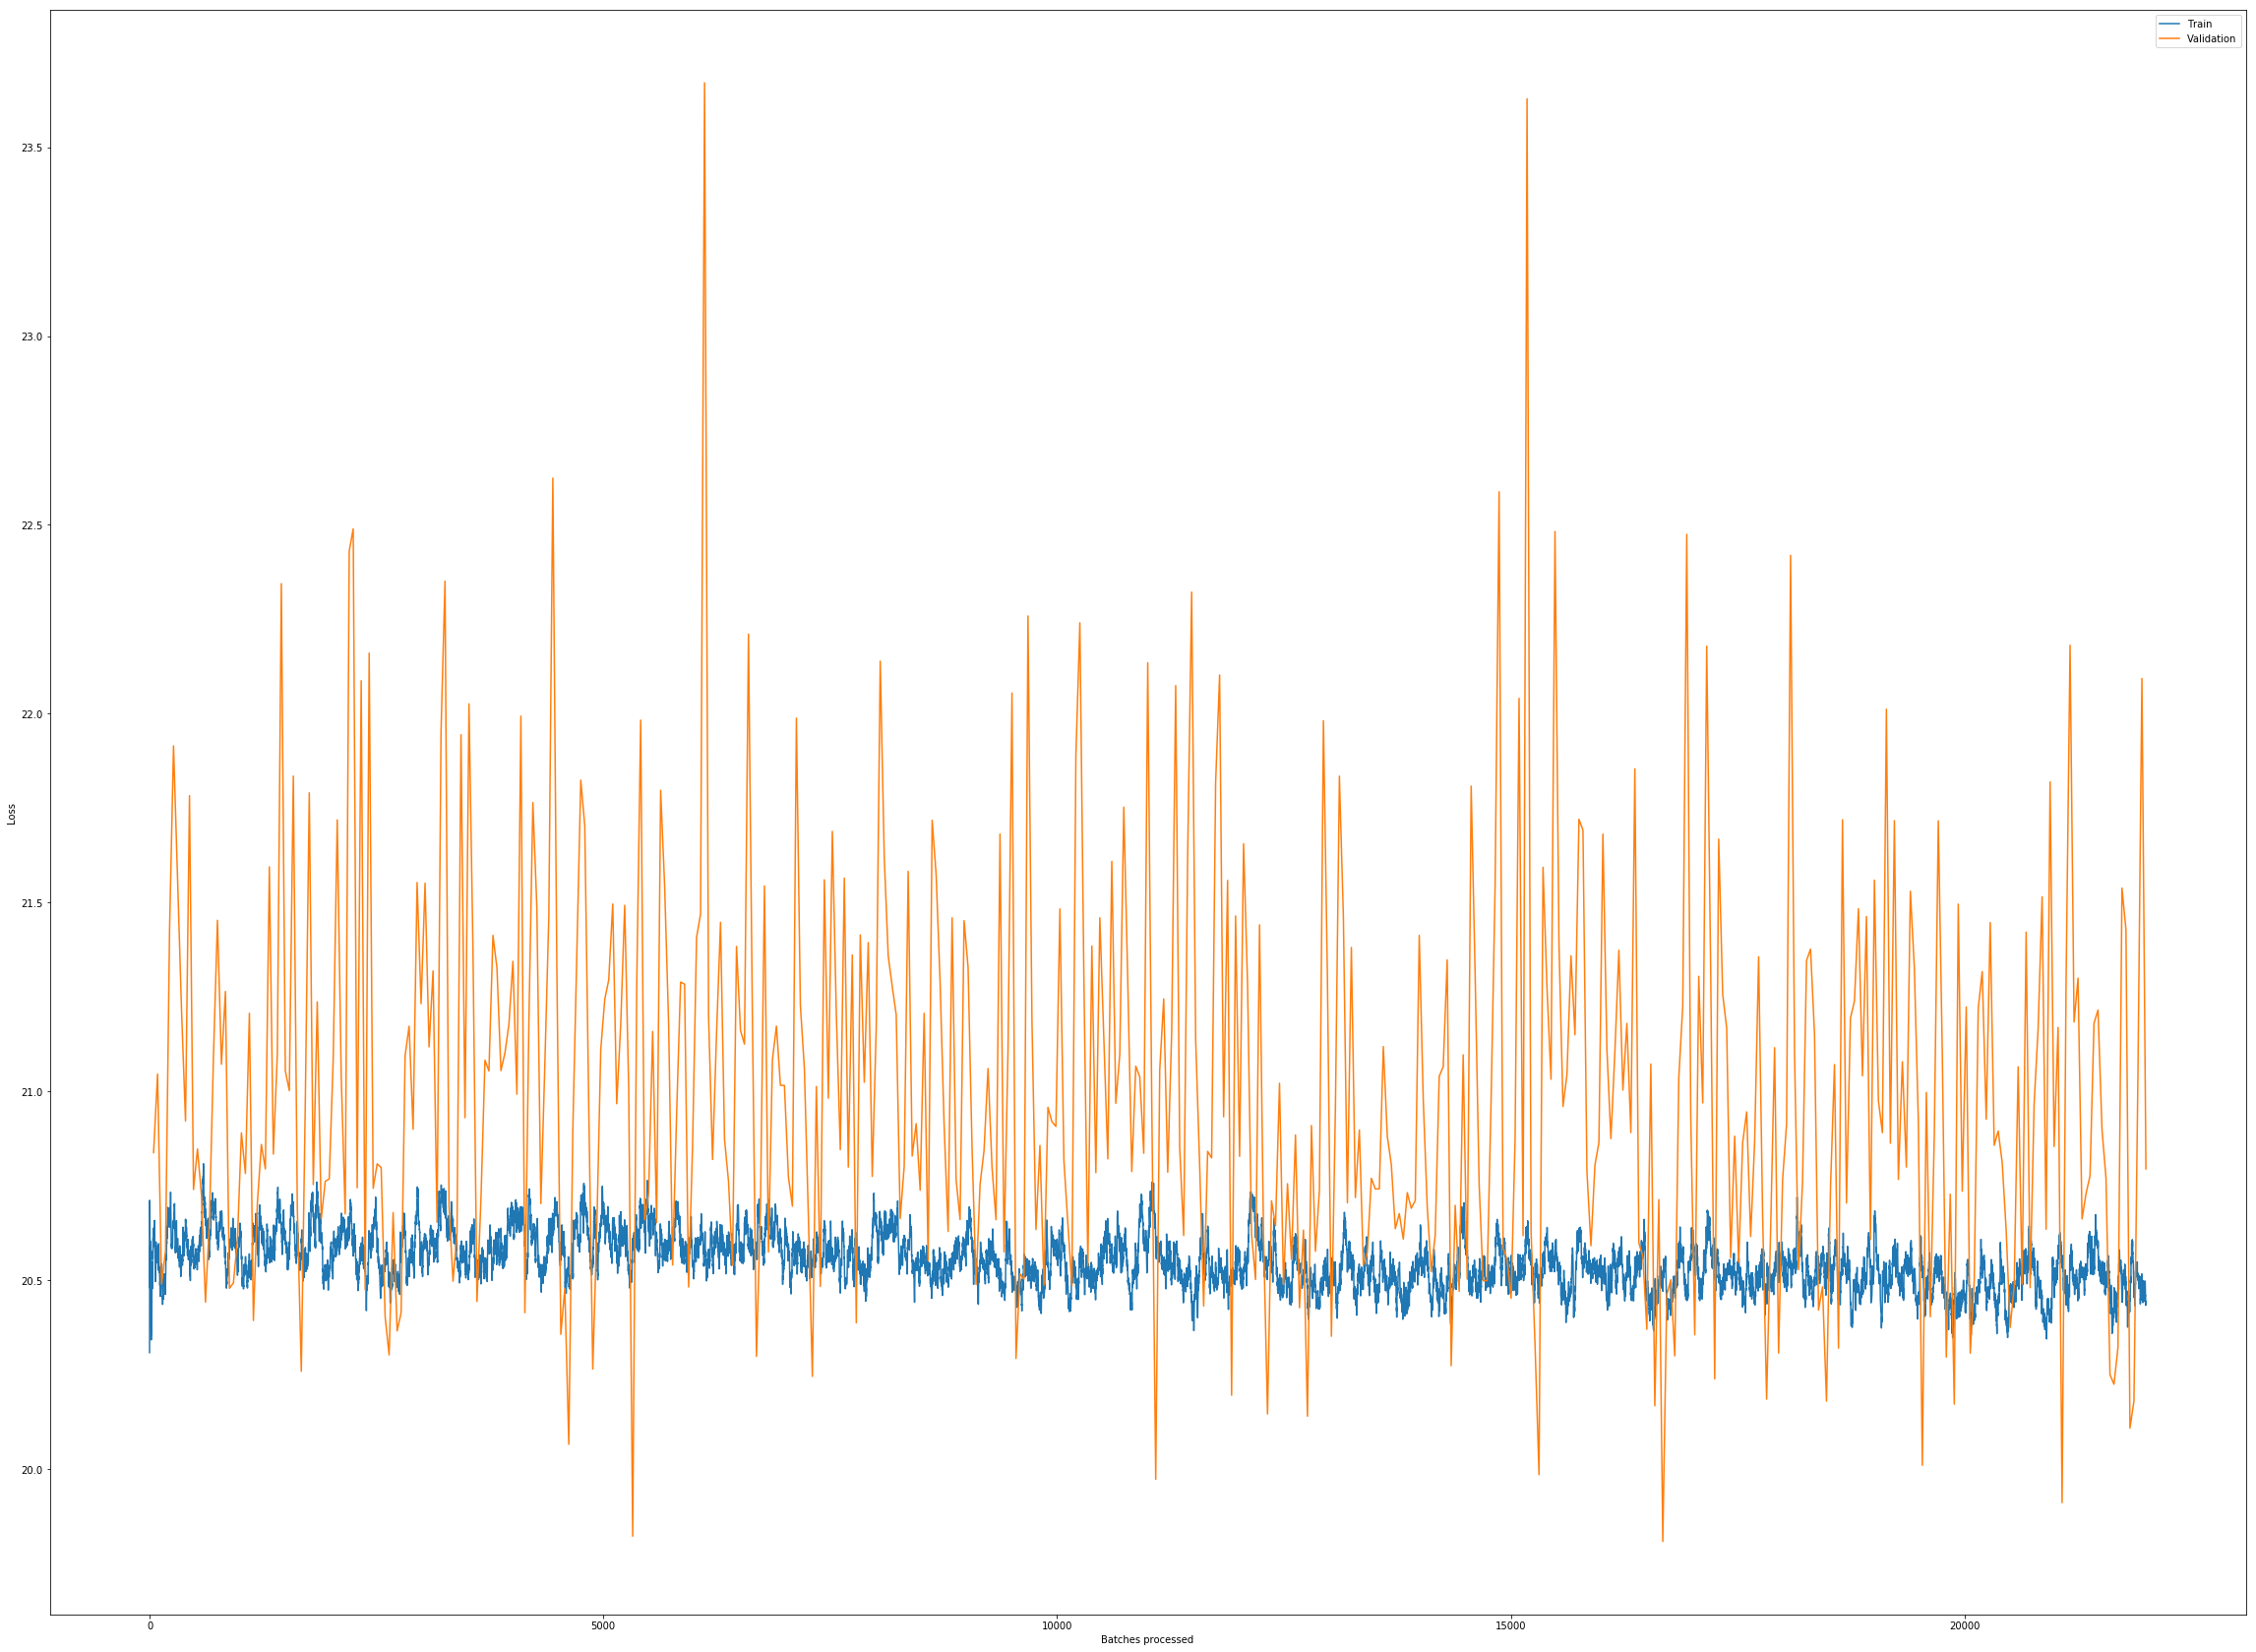

In [79]:
l.recorder.plot_losses()

In [86]:
l.save(f"speedup_{optimizer}_batch_norm_{batch_norm}_{loss_func}_nlayers_{len(layers_sizes)}")

In [7]:
val_df = pd.DataFrame()
train_df = pd.DataFrame()

preds, targets = l.get_preds(fai.basic_data.DatasetType.Valid)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

val_df['prediction'] = preds
val_df['target'] = targets
val_df['abs_diff'] = np.abs(preds - targets)
val_df['APE'] = np.abs(val_df.target - val_df.prediction)/val_df.target * 100

preds, targets = l.get_preds(fai.basic_data.DatasetType.Train)

preds = preds.reshape((-1,)).numpy()
targets = targets.reshape((-1,)).numpy()

train_df['prediction'] = preds
train_df['target'] = targets
train_df['abs_diff'] = np.abs(preds - targets)
train_df['APE'] = np.abs(train_df.target - train_df.prediction)/train_df.target * 100

In [8]:
val_df.describe() #MAPE loss

,prediction,target,abs_diff,APE
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.583753,2.030625,0.761118,39.932007
std,1.351380,1.775879,0.890533,32.495262
min,0.048963,0.038235,0.000405,0.203580
25%,0.574952,0.684233,0.156295,16.902315
50%,1.131436,1.518185,0.448943,33.866941
75%,2.293313,2.785208,1.084316,57.161997
max,6.302624,9.649230,5.606473,384.061310


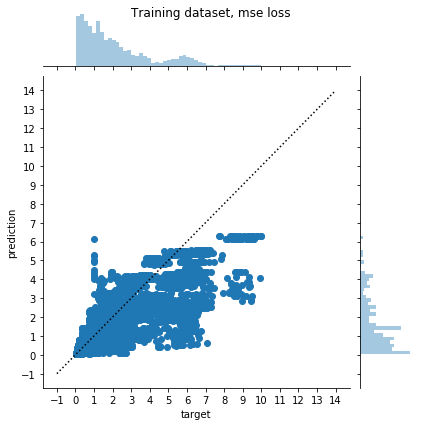

In [10]:
joint_plot(train_df, f"Training dataset, {loss_func} loss")

In [11]:
x, y = get_schedule_data(val_dl, (0, 0, 0))


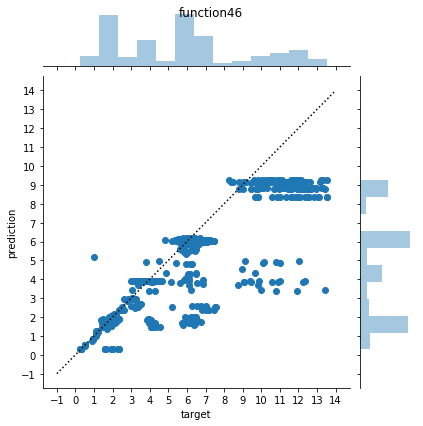

In [8]:
rand_prog = 'function' + str(np.random.randint(0, 400))
joint_plot_one_program(val_dl, 'function46', l.model)